In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('income.csv')

In [3]:
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [14]:
import matplotlib.pyplot as plt 

Text(0, 0.5, 'Income')

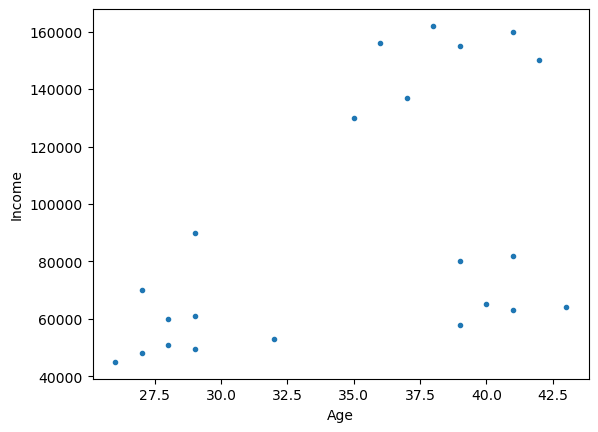

In [21]:
plt.scatter(df['Age'], df['Income($)'], marker='.')
plt.xlabel('Age')
plt.ylabel('Income')

In [4]:
from sklearn.cluster import KMeans

In [10]:
knn_model = KMeans(n_clusters=3)

In [11]:
knn_model.fit(df[['Age', 'Income($)']])

/Users/manojkumarkolli/Documents/Anaconda/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [12]:
knn_model.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

In [22]:
preds = knn_model.predict(df[['Age', 'Income($)']])

In [23]:
preds

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [24]:
df["cluster"] = preds

In [25]:
df

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0


In [26]:
cluster_0 = df[df['cluster'] == 0]
cluster_1 = df[df['cluster'] == 1]
cluster_2 = df[df['cluster'] == 2]

In [27]:
cluster_0

,Name,Age,Income($),cluster
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0
10,Donald,37,137000,0


Text(0, 0.5, 'Income')

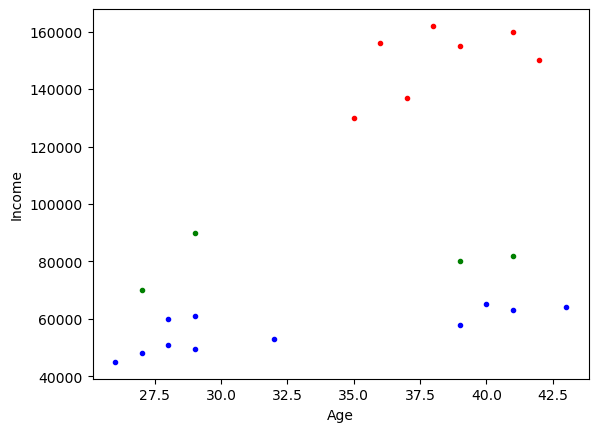

In [30]:
plt.scatter(cluster_0['Age'], cluster_0['Income($)'], marker='.', color="red")
plt.scatter(cluster_1['Age'], cluster_1['Income($)'], marker='.', color="blue")
plt.scatter(cluster_2['Age'], cluster_2['Income($)'], marker='.', color="green")

plt.xlabel('Age')
plt.ylabel('Income')

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
pp = MinMaxScaler()

In [34]:
df['Age'] = pp.fit_transform(df[['Age']])

In [36]:
df['Income($)'] = pp.fit_transform(df[['Income($)']])

In [37]:
knn_model = KMeans(n_clusters=3)
knn_model.fit(df[['Age', 'Income($)']])

/Users/manojkumarkolli/Documents/Anaconda/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [38]:
knn_model.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428]])

In [39]:
preds = knn_model.predict(df[['Age', 'Income($)']])

In [40]:
preds

array([2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [41]:
df["cluster"] = preds

In [42]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [43]:
cluster_0 = df[df['cluster'] == 0]
cluster_1 = df[df['cluster'] == 1]
cluster_2 = df[df['cluster'] == 2]

Text(0, 0.5, 'Income')

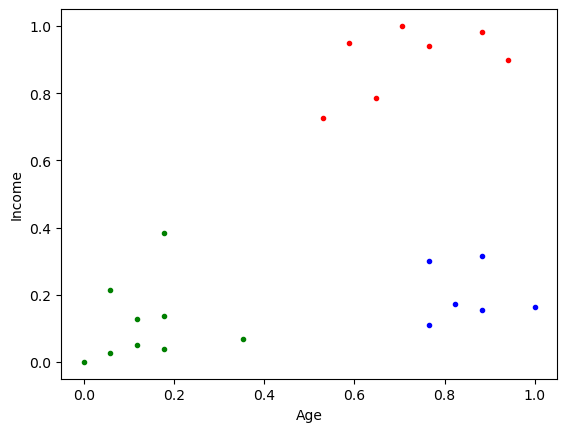

In [44]:
plt.scatter(cluster_0['Age'], cluster_0['Income($)'], marker='.', color="red")
plt.scatter(cluster_1['Age'], cluster_1['Income($)'], marker='.', color="blue")
plt.scatter(cluster_2['Age'], cluster_2['Income($)'], marker='.', color="green")

plt.xlabel('Age')
plt.ylabel('Income')

In [47]:
centroids = knn_model.cluster_centers_

Text(0, 0.5, 'Income')

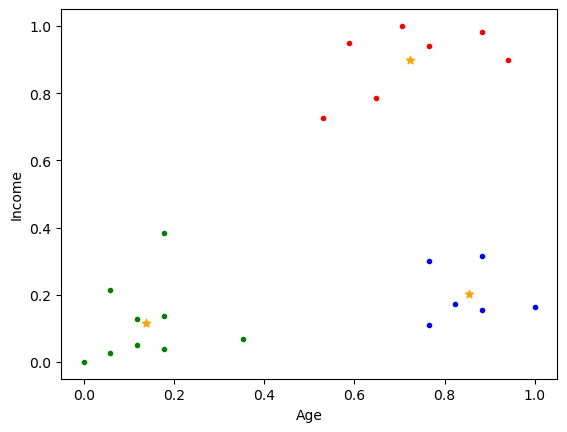

In [48]:
plt.scatter(cluster_0['Age'], cluster_0['Income($)'], marker='.', color="red")
plt.scatter(cluster_1['Age'], cluster_1['Income($)'], marker='.', color="blue")
plt.scatter(cluster_2['Age'], cluster_2['Income($)'], marker='.', color="green")
plt.scatter(centroids[:,0], centroids[:,1], marker = "*", color = 'orange')

plt.xlabel('Age')
plt.ylabel('Income')

In [49]:
sse = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Age', 'Income($)']])
    sse.append(kmeans.inertia_)

/Users/manojkumarkolli/Documents/Anaconda/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/manojkumarkolli/Documents/Anaconda/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/manojkumarkolli/Documents/Anaconda/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/manojkumarkolli/Documents/Anaconda/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

In [51]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.27612937677853544,
 0.22020960864009398,
 0.17681044133887713,
 0.1407244898535231,
 0.10740235405674735]

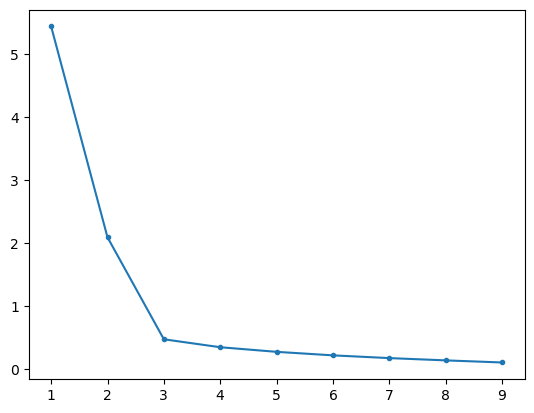

In [53]:
k_range = range(1,10)
plt.plot(k_range, sse, marker=".")